# K Nearest Neighbours

Objective: Predict drug type   
Dataset: drug200.csv  
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('drug200.csv')
print(data.shape)
data.head()

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Data Exploration

drugY    91
drugX    54
drugA    23
drugB    16
drugC    16
Name: Drug, dtype: int64


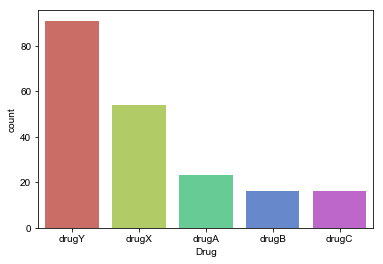

In [2]:
print(data['Drug'].value_counts())

sns.countplot(x='Drug',data = data, palette='hls',order = data['Drug'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

M    104
F     96
Name: Sex, dtype: int64


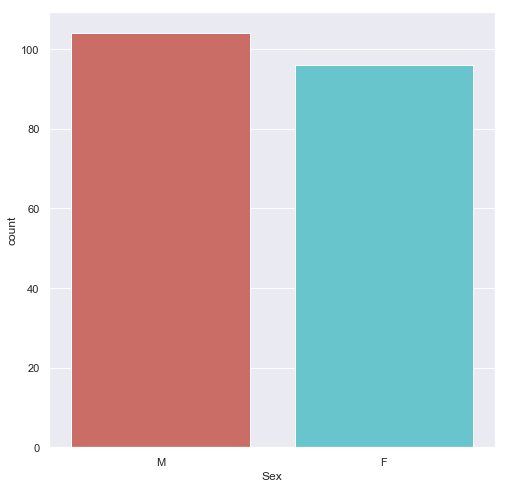

In [3]:
print(data['Sex'].value_counts())

sns.countplot(x='Sex',data = data, palette='hls',order = data['Sex'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64


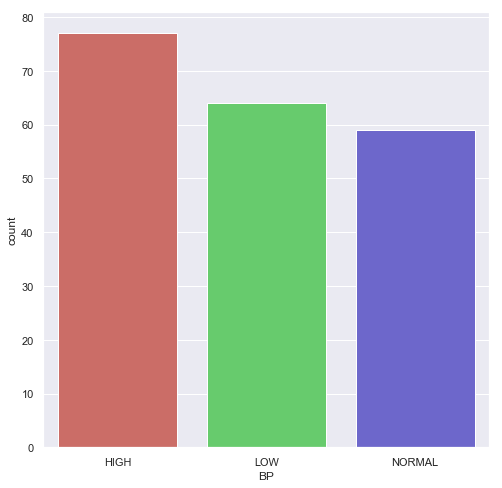

In [4]:
print(data['BP'].value_counts())

sns.countplot(x='BP',data = data, palette='hls',order = data['BP'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64


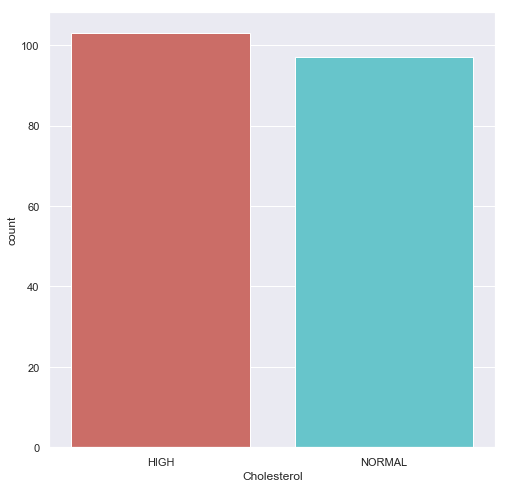

In [5]:
print(data['Cholesterol'].value_counts())

sns.countplot(x='Cholesterol',data = data, palette='hls',order = data['Cholesterol'].value_counts().index)
sns.set(rc={'figure.figsize':(8,8)})
plt.show()

## Convert Categorical to Numerical

In [6]:
data["Sex"] = data["Sex"].astype('category')
data["Sex_cat"] = data["Sex"].cat.codes      # F=0, M=1

data["BP"] = data["BP"].astype('category')
data["BP_cat"] = data["BP"].cat.codes        # HIGH=0, LOW=1, NORMAL=2

data["Cholesterol"] = data["Cholesterol"].astype('category')
data["Cholesterol_cat"] = data["Cholesterol"].cat.codes    # HIGH=0, NORMAL=1

data["Drug"] = data["Drug"].astype('category')
data["Drug_cat"] = data["Drug"].cat.codes     #drugY=4, drugC=2, drugX=3, drugA=0, drugB=1

data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cat,BP_cat,Cholesterol_cat,Drug_cat
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2
2,47,M,LOW,HIGH,10.114,drugC,1,1,0,2
3,28,F,NORMAL,HIGH,7.798,drugX,0,2,0,3
4,61,F,LOW,HIGH,18.043,drugY,0,1,0,4


## Correlation

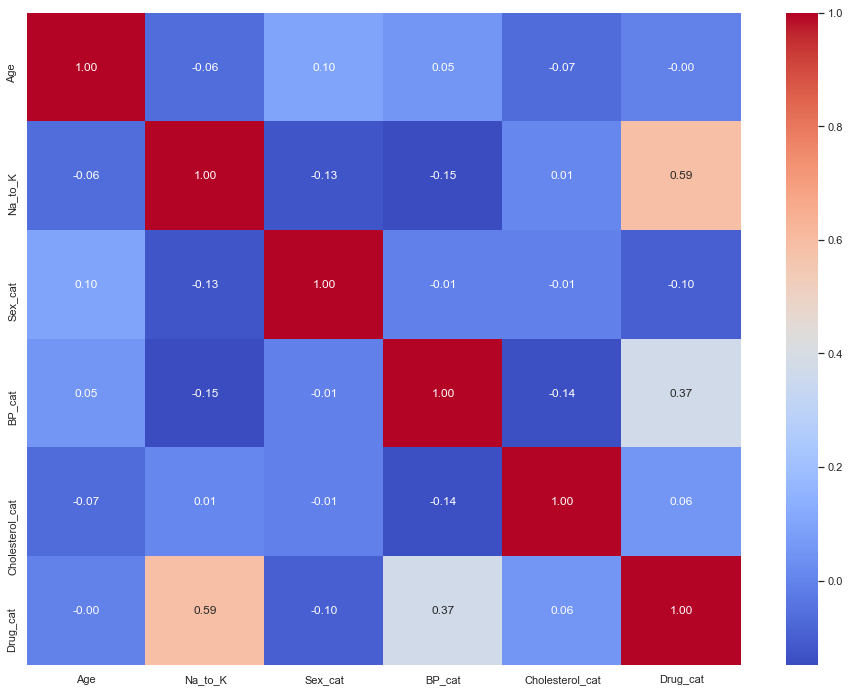

In [7]:
plt.figure(figsize=(16,12))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [8]:
corr_rank = data.corr()
corr_rank["Drug_cat"].sort_values(ascending=False)

Drug_cat           1.000000
Na_to_K            0.589120
BP_cat             0.372868
Cholesterol_cat    0.055629
Age               -0.004828
Sex_cat           -0.098573
Name: Drug_cat, dtype: float64

## Data Processing and Selection

In [9]:
X = data[['Na_to_K','BP_cat','Cholesterol_cat','Age','Sex_cat']].values
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (200, 5)


array([[25.355,  0.   ,  0.   , 23.   ,  0.   ],
       [13.093,  1.   ,  0.   , 47.   ,  1.   ]])

In [10]:
y = data["Drug_cat"]
print('Target Dataset', y.shape)
y[0:5]

Target Dataset (200,)


0    4
1    2
2    2
3    3
4    4
Name: Drug_cat, dtype: int8

## Data Standardization

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print('Feature Dataset', X.shape)
X[0:2]

Feature Dataset (200, 5)


array([[ 1.28652212, -1.11016894, -0.97043679, -1.29159102, -1.040833  ],
       [-0.4151454 ,  0.10979693, -0.97043679,  0.16269866,  0.96076892]])

## Split Train Test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X TRAIN Set: ", X_train.shape, y_train.shape)
print("X TEST Set : ", X_test.shape, y_test.shape)

X TRAIN Set:  (160, 5) (160,)
X TEST Set :  (40, 5) (40,)


## K Nearest Neighbour

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#using loop to find the best accuracy and the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    neighf = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neighf.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat) 
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(np.round(mean_acc,4))

[0.8   0.825 0.825 0.75  0.8   0.7   0.75  0.7   0.8  ]


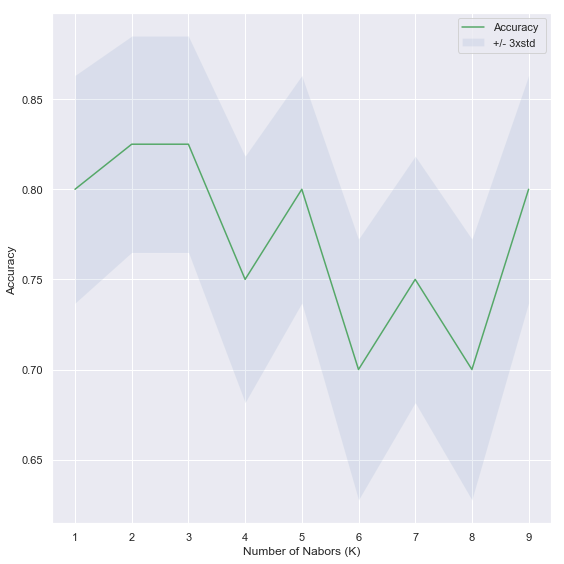

The best accuracy was 0.825 with k= 2


In [14]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", round(mean_acc.max(),4), "with k=", mean_acc.argmax()+1) 

In [15]:
k = 2
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

print("Train set Accuracy: ", round(metrics.accuracy_score(y_train, neigh.predict(X_train)),4))
print("Test set Accuracy : ", round(metrics.accuracy_score(y_test, yhat),4))

Train set Accuracy:  0.9062
Test set Accuracy :  0.825


## Test Prediction

In [16]:
df_pred1 = data[data.index == 0]
df_pred2 = data[data.index == 1]

df_pred = df_pred1.append(df_pred2)
df_pred.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_cat,BP_cat,Cholesterol_cat,Drug_cat
0,23,F,HIGH,HIGH,25.355,drugY,0,0,0,4
1,47,M,LOW,HIGH,13.093,drugC,1,1,0,2


In [17]:
Xp = df_pred[['Na_to_K','BP_cat','Cholesterol_cat','Age','Sex_cat']].values
Xp = scaler.transform(Xp)

yp = df_pred["Drug_cat"]

pred = neigh.predict(Xp)
pred

array([4, 2], dtype=int8)